In [2]:
%%capture
!pip install wandb #installs weight and bias library
!apt-get install poppler-utils #install utilities for PDF files
!pip install pdf2image #installs pdf to images library (convert)
!pip install flashtorch #install PyTorch-based visualizations
import requests #to make HTTP requests
from pdf2image import convert_from_path #to convert PDF files to images
import matplotlib.pyplot as plt #to generate plots
import numpy as np #for numerical operations
import torch #for tensor computations
import requests
from torchvision import * #for computer vision
from torchvision.models import * #pretained models in torchvision
import wandb as wb #weight and bias libary

In [40]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #sets device to GPU (if available) else sets it to CPU

def GPU(data): #defining a function that moves data to GPU with gradient computation enabled
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

def GPU_data(data): #defining a function that moves data to GPU without gradient computation enabled
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)

def plot(x): #defining a function to plot an image
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

def get_google_slide(url): #defining a function that generates URL and exports a google slide as PDF
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5] #gets the presentation ID
    page_id = url.split('.')[-1] #gets the page ID
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id #makes the URL for the PDF

def get_slides(url): #allows us to fetch slides and convert them to images
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True) #fetch PDF
    open('file.pdf', 'wb').write(r.content) #save PDF file locally
    images = convert_from_path('file.pdf', 500) #convert PDF to images
    return images

def load(image, size=224): #cropping images; loads and preprocesses images for model input
    means = [0.485, 0.456, 0.406] #image normalization mean values
    stds = [0.229, 0.224, 0.225] #image normalization standard deviation values
    transform = transforms.Compose([
        transforms.Resize(size), #resizes image
        transforms.CenterCrop(size), #center crop image
        transforms.ToTensor(),  #convert the image to PyTorch tensor
        transforms.Normalize(means, stds)
    ])
    tensor = transform(image).unsqueeze(0).to(device)  #apply transformation and move tensor to device
    tensor.requires_grad = True #enable gradient computation for tensor
    return tensor



In [41]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} #fetches labels from the url

model = alexnet(weights='DEFAULT').to(device) #loads the AlexNet model and move to device
model.eval(); #set model to evaluation mode

In [35]:
url = "https://docs.google.com/presentation/d/1P4j2N6uSwv88M_8yurO5d0tiWuL-DrlU0HVwh6cK1kg/edit#slide=id.p" #slides link to take from

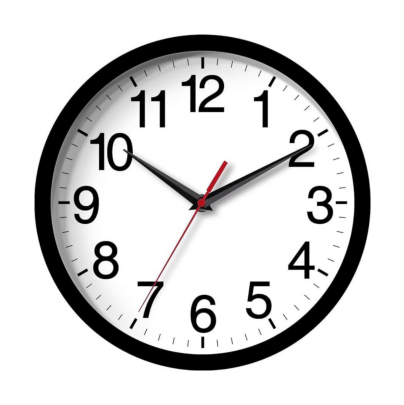

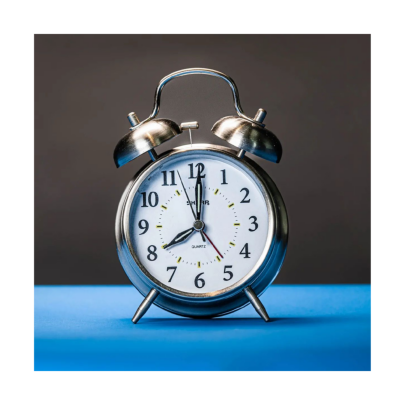

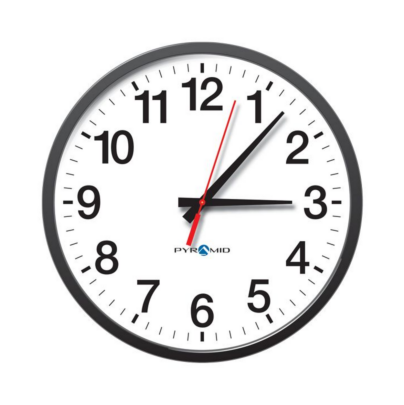

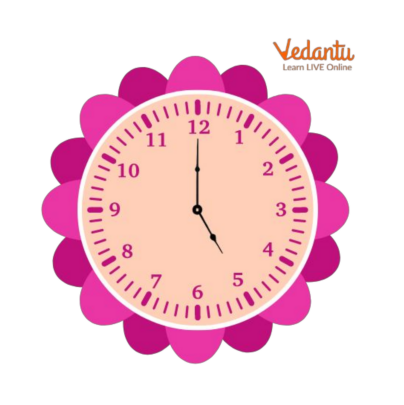

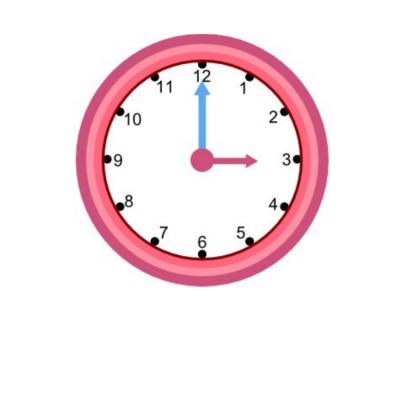

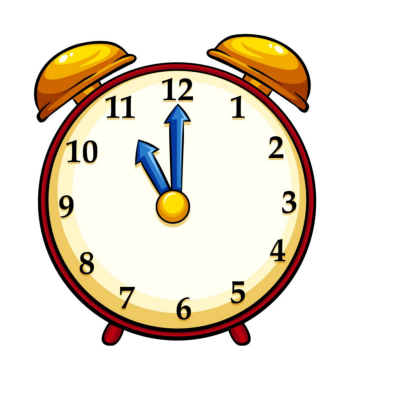

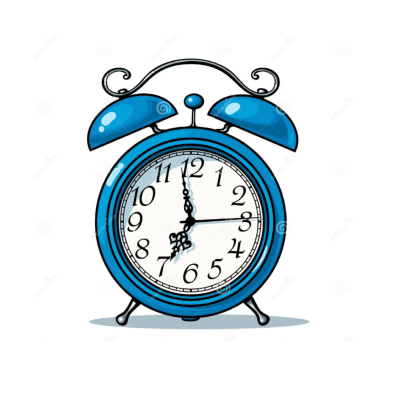

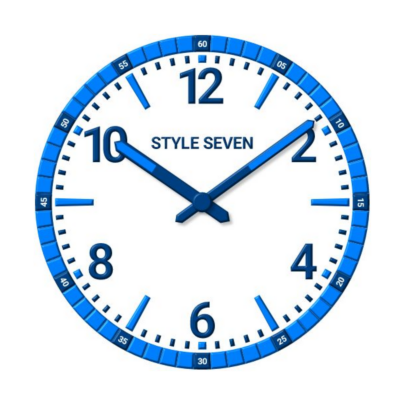

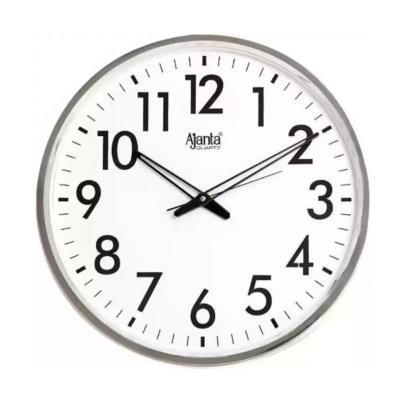

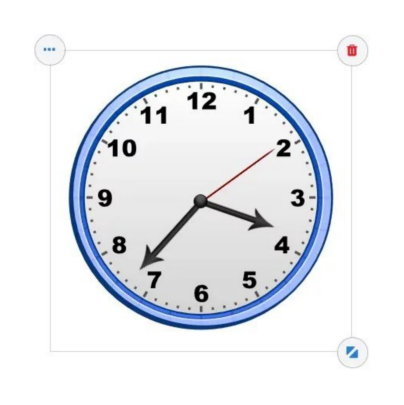

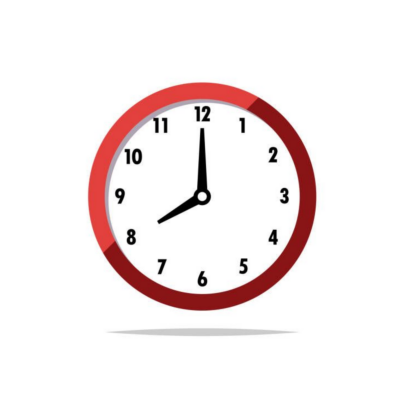

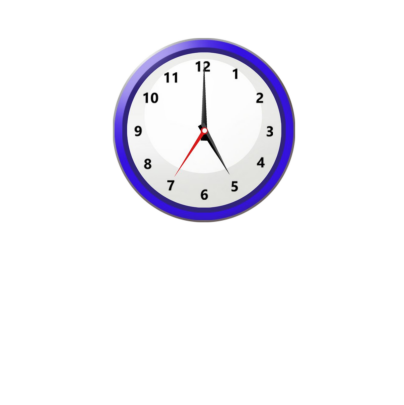

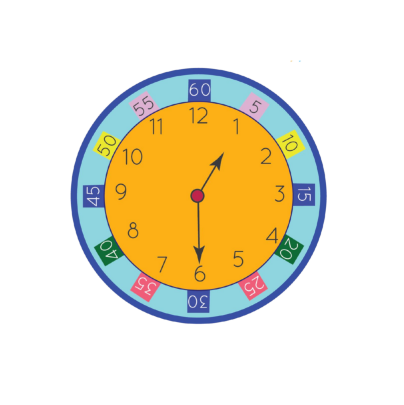

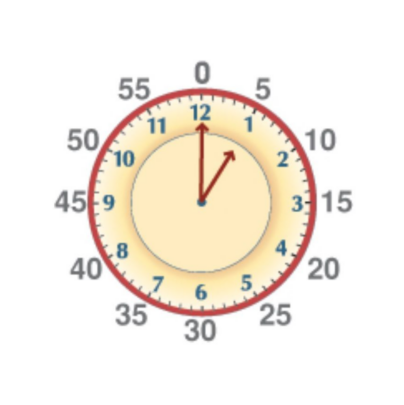

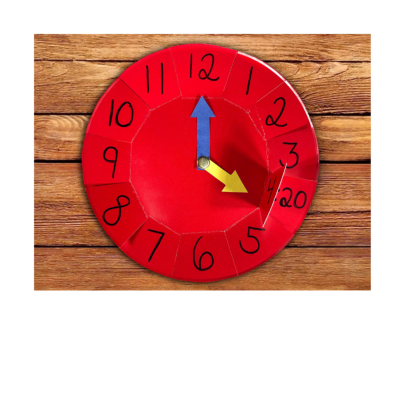

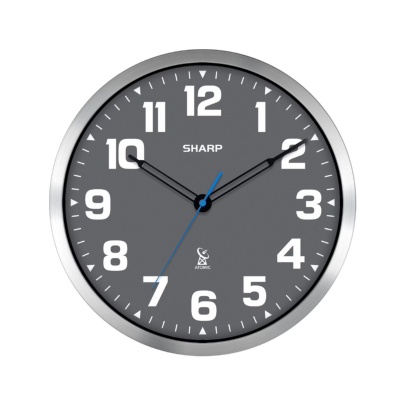

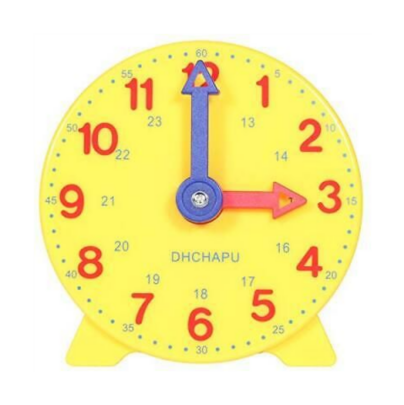

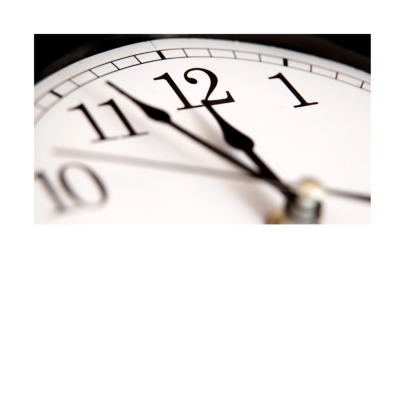

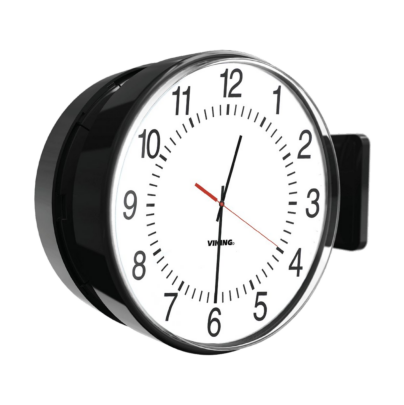

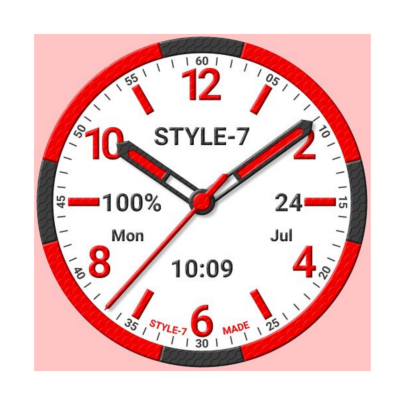

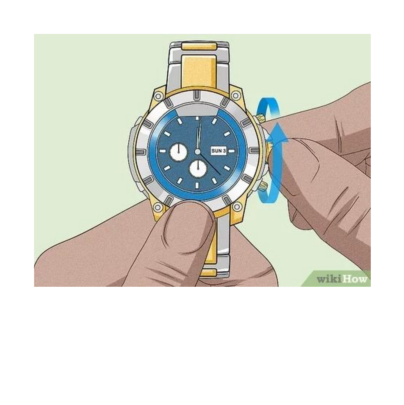

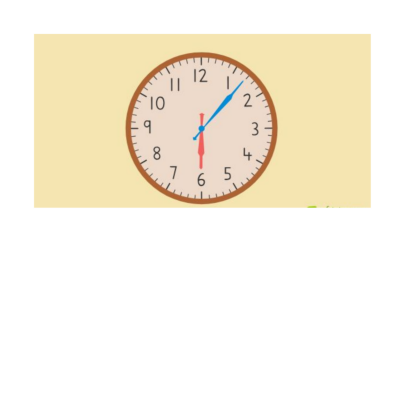

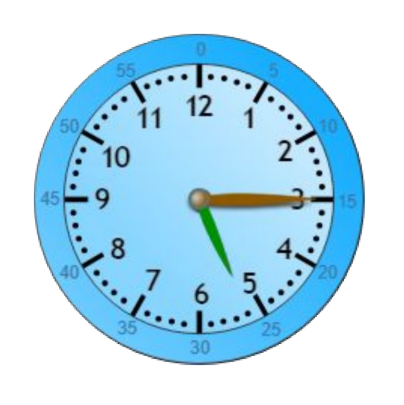

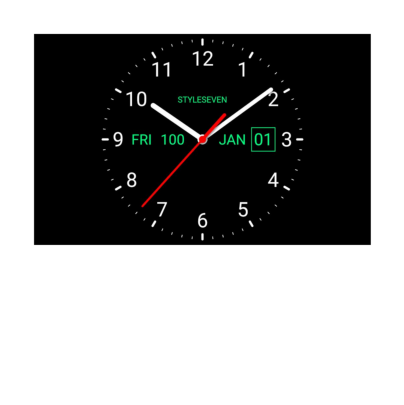

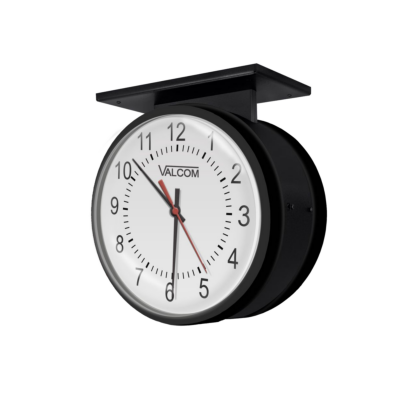

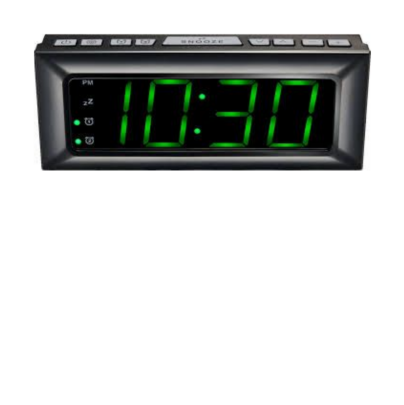

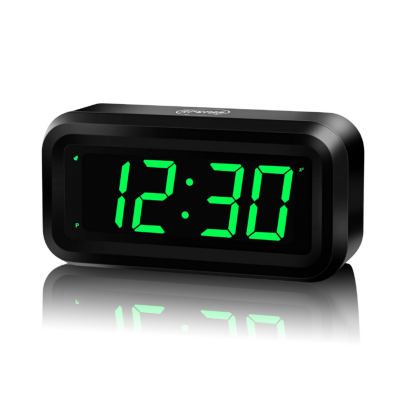

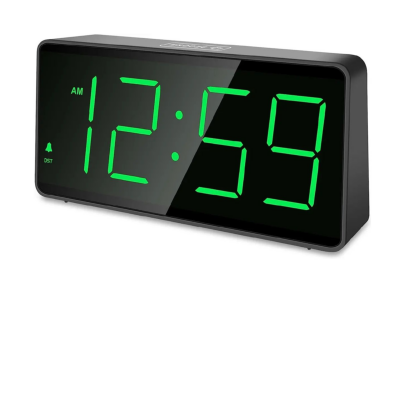

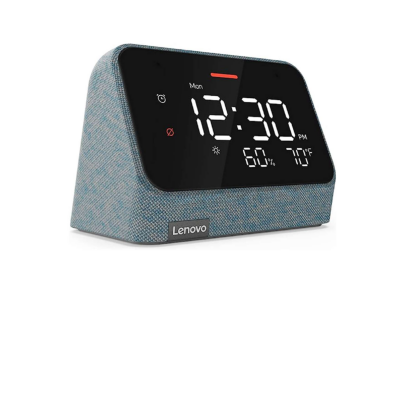

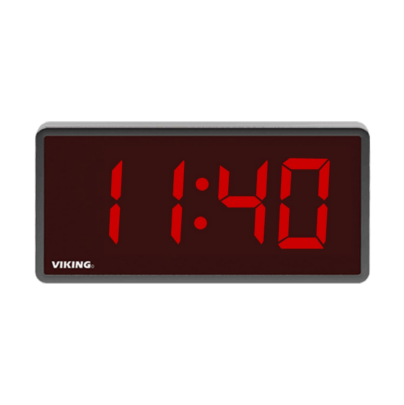

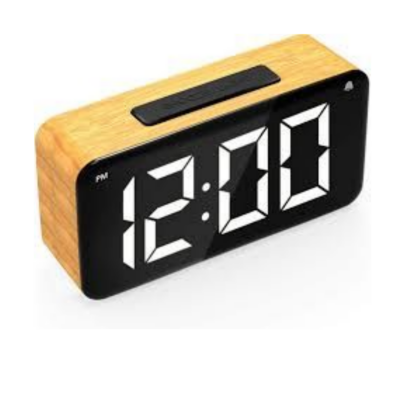

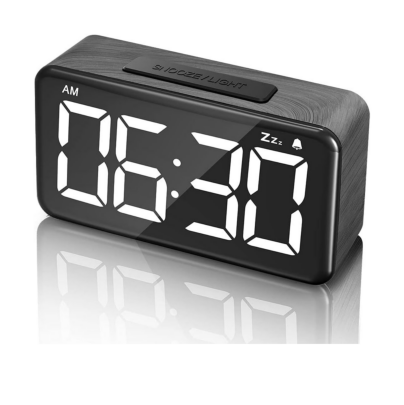

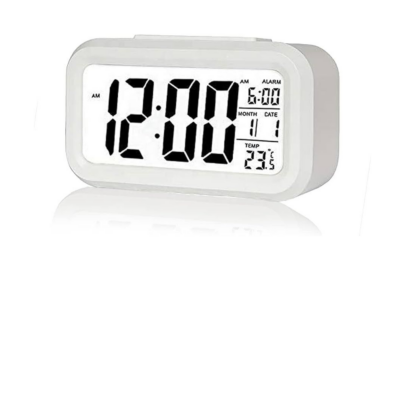

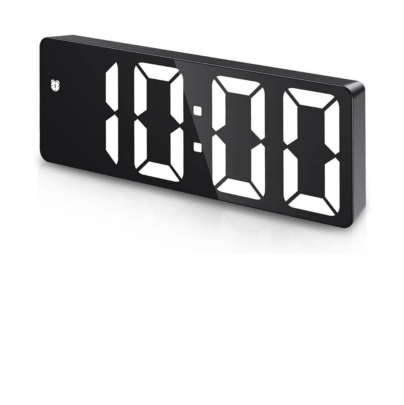

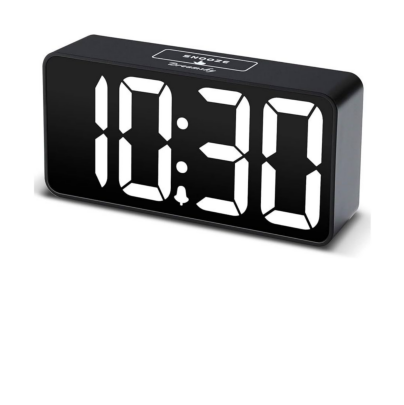

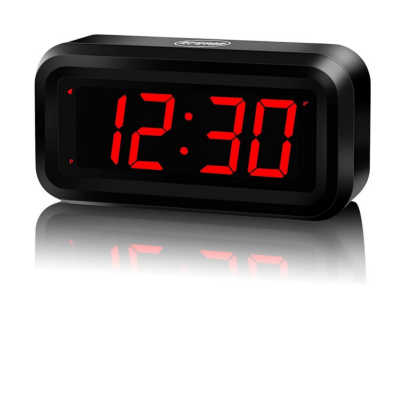

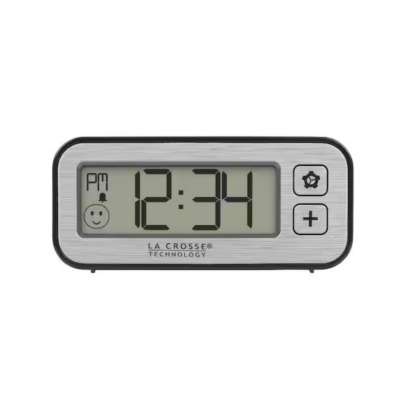

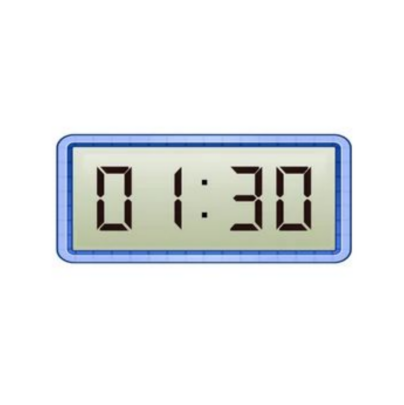

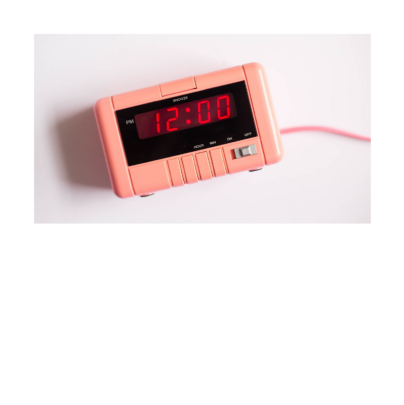

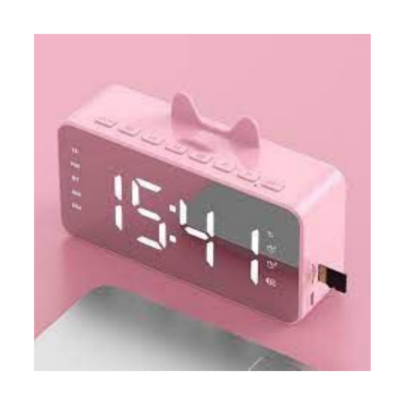

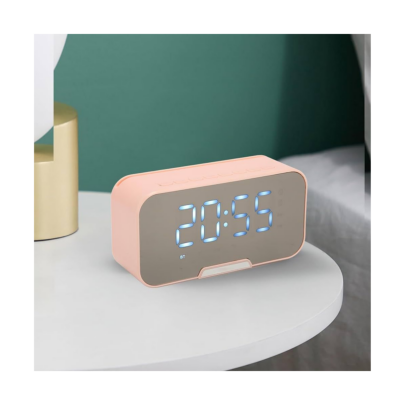

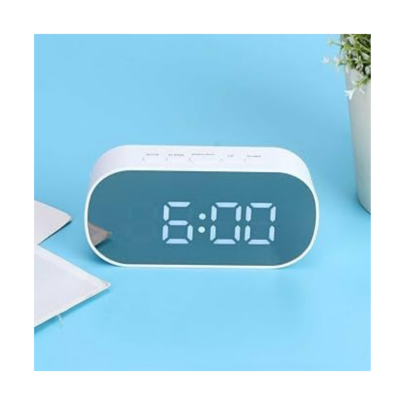

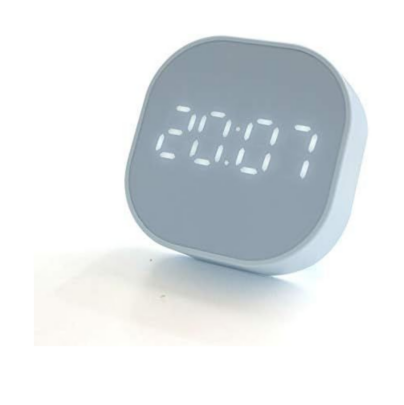

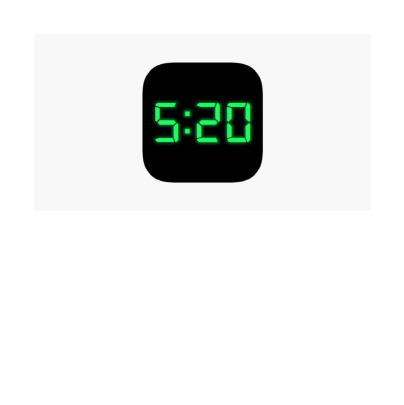

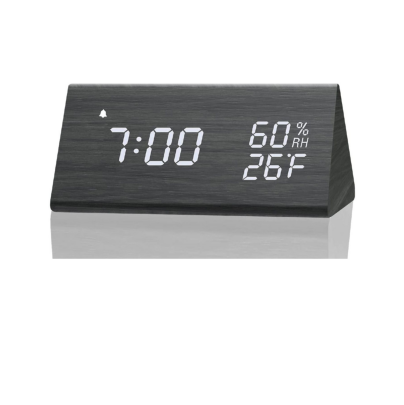

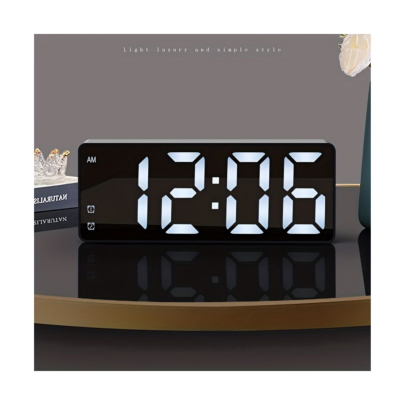

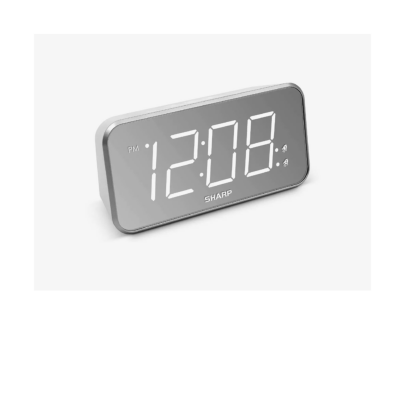

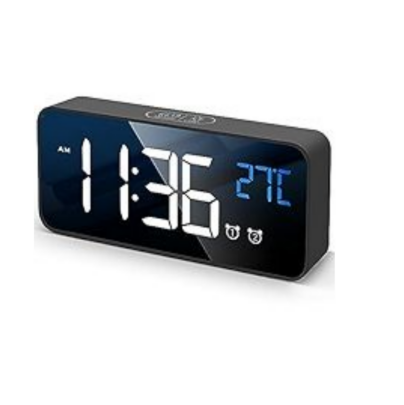

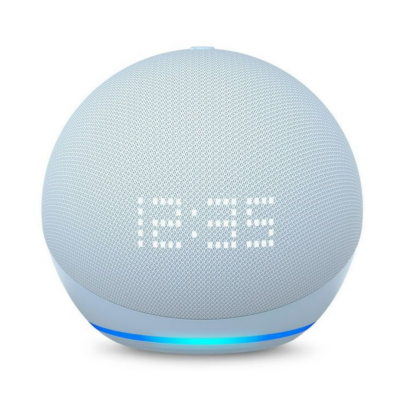

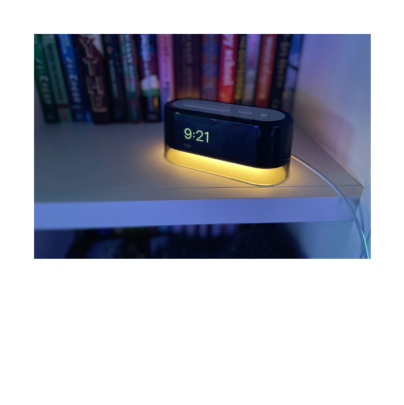

In [36]:
images = [] #creates a stack of images from the slide url provided

for image in get_slides(url): #for all images in the url

    plot(image) #plots the image

    images.append(load(image)) #appends each image onto the other (like adding strings)

images = torch.vstack(images) #final result is stored in images

In [37]:
images.shape #shows the dimensions of images

torch.Size([50, 3, 224, 224])

In [42]:
model(images) #passes the images through the model to get predictions

tensor([[-4.4616, -4.4237, -1.9344,  ..., -0.2022,  2.1472,  5.3740],
        [-3.5248, -4.0392,  0.3698,  ..., -3.0897, -3.3502,  2.7341],
        [-3.4528, -3.0763, -1.5938,  ...,  0.7691,  1.1747,  4.0479],
        ...,
        [-5.0217, -6.5983, -2.2989,  ..., -4.9940, -1.6407,  4.4286],
        [-1.1662, -0.7160, -2.6015,  ..., -3.0979, -1.6450,  7.9256],
        [-1.9837, -2.8781, -3.0001,  ..., -4.4705,  0.3612,  2.6387]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [43]:
y = model(images) #defines y to be model(images)

In [44]:
y.shape  #takes the shape of the mdoerl 50x1000

torch.Size([50, 1000])

In [45]:
guesses = torch.argmax(y, 1).cpu().numpy() #index of max value

In [46]:
for i in list(guesses): #iterate for total guesses in the list
    print(labels[i]) #prints all possible labels for the images

analog clock
analog clock
analog clock
wall clock
wall clock
wall clock
analog clock
analog clock
analog clock
analog clock
wall clock
analog clock
wall clock
analog clock
wall clock
analog clock
wall clock
analog clock
analog clock
analog clock
electric fan, blower
analog clock
analog clock
analog clock
analog clock
digital clock
digital clock
digital clock
digital clock
digital clock
digital clock
digital clock
digital clock
street sign
digital clock
digital clock
digital clock
digital clock
digital clock
digital clock
rubber eraser, rubber, pencil eraser
street sign
digital clock
digital clock
digital clock
digital clock
digital clock
digital clock
CD player
digital clock


In [47]:
Y = np.zeros(50,) #initalize a np array with 50 zeros
Y[25:] = 1 #sets all values after 25 to be 1

In [48]:
Y #displays y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [49]:
# Y = np.zeros(100,) #(in this case we would have 100 zeros, and after 50 they would be 1s)
# Y[50:] = 1

In [50]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
X = y.detach().cpu().numpy() #convert the predictions tensor to a numpy array and detach it from the computation graph

In [52]:
X.shape #50x1000

(50, 1000)

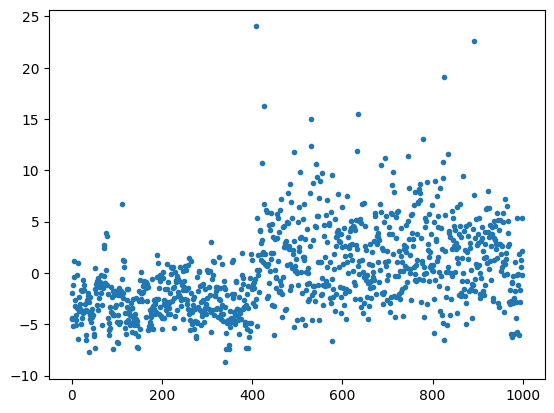

In [53]:
plt.plot(X[0],'.') #plots the first array row

(array([ 46., 288., 331., 188., 106.,  28.,   7.,   3.,   1.,   2.]),
 array([-8.72612381, -5.45092344, -2.17572284,  1.09947753,  4.37467813,
         7.6498785 , 10.92507935, 14.20027924, 17.47547913, 20.75068092,
        24.02588081]),
 <BarContainer object of 10 artists>)

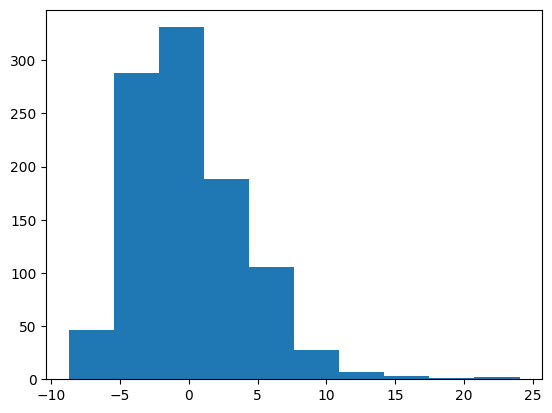

In [54]:
plt.hist(X[0]) #plot the first array row (histogram)

In [55]:
X = GPU_data(X) #moves data to GPU for processing
Y = GPU_data(Y) #moves the modified data array to GPU for processing

In [56]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [57]:
def cross_entropy(outputs, labels): #cross-entropy loss function; computes the cross-entropy loss between predicted outputs and true labels
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [58]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [59]:
def Truncated_Normal(size): #truncated normal random numbers

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z #returns numbers with shape 'size' following the TN distribution

In [60]:
def acc(out,y): #accuracy function
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [61]:
X.shape #checks shape of X (50x1000)

torch.Size([50, 1000])

In [62]:
def get_batch(mode): #batch of data
    b = c.b #batch size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) #random index for training batch
        x = X[r:r+b,:] #training batch input
        y = Y[r:r+b] #training batch output
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b) #random index for test batch
        x = X_test[r:r+b,:] #test batch input
        y = Y_test[r:r+b] #test batch output
    return x,y

In [63]:
def model(x,w): #linear model

    return x@w[0] #matrix mult to return model predictions

In [64]:
def make_plots(): #make plots and log training accuracy

    acc_train = acc(model(x,w),y) #define training acc

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train}) #log training acc

In [ ]:
wb.init(project="Linear_Model_Photo_1"); #weights and bias project
c = wb.config #configuration object

c.h = 0.001 #learning rate
c.b = 32 #batch size
c.epochs = 100000 #number of epochs

w = [GPU(Truncated_Normal((1000,2)))] #initialize weights with TN Random Numbers

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs): #training loop

    x,y = get_batch('train') #to get training batch

    loss = cross_entropy(softmax(model(x,w)),y) #calculate loss

    optimizer.zero_grad()
    loss.backward() #back propagation
    optimizer.step()

    wb.log({"loss": loss}) #log the loss

    make_plots() #make plots and log accuracy


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-40-2266d7e5c745>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)
